## Context

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

## Content
Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
    The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.
    
    
## Data Source 
   This data is downloaded from : https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
   
   
## Evaluation 

 Prediction accuracy > 95 % 

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix

# Loading the data 

In [36]:
#heart_disease1 = pd.read_csv("heart.csv")

heart_disease = pd.read_csv("heart-disease.csv")

In [42]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:ylabel='Frequency'>

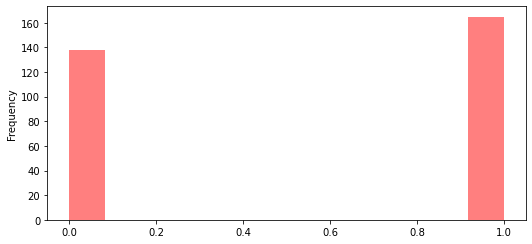

In [52]:
heart_disease["target"].plot.hist(bins=12, alpha=0.5, color=["red"])

In [53]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [56]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [57]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [61]:
heart_disease.sex.value_counts()
# 0 : female, 1: male

1    207
0     96
Name: sex, dtype: int64

In [60]:
pd.crosstab(heart_disease.sex, heart_disease.target)

target,0,1
sex,,
0,24,72
1,114,93


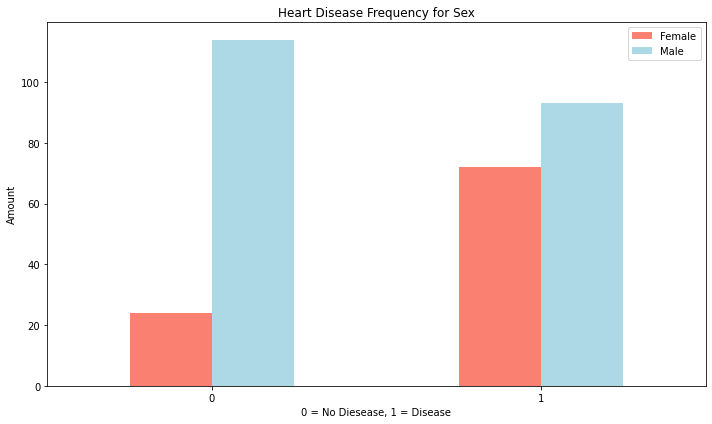

In [63]:
# Create a plot of crosstab
pd.crosstab(heart_disease.target, heart_disease.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

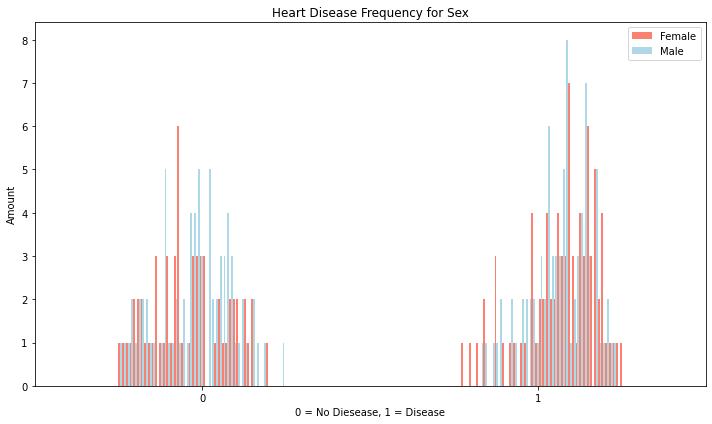

In [66]:
# Create a plot of crosstab
pd.crosstab(heart_disease.target, heart_disease.thalach).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

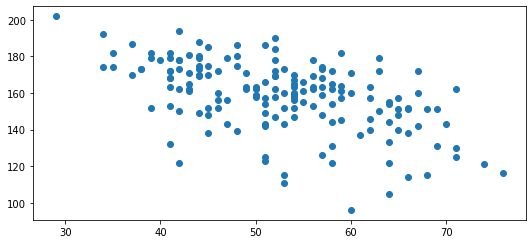

In [74]:
plt.scatter( heart_disease.age[heart_disease.target == 1] ,  heart_disease.thalach[heart_disease.target == 1] )

In [73]:
heart_disease.age[heart_disease.target == 1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

<AxesSubplot:ylabel='Frequency'>

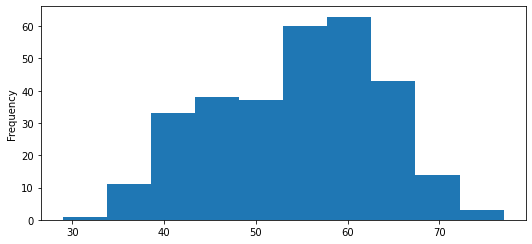

In [76]:
heart_disease.age.plot.hist()

<AxesSubplot:>

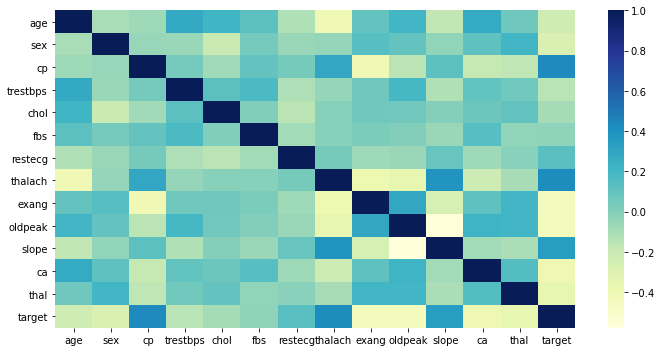

In [89]:
heart_disease.corr()
plt.figure(figsize=(10, 5))
sns.heatmap( heart_disease.corr() , fmt = ".2f", cmap = 'YlGnBu')

# Data preparation

In [96]:
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

In [102]:
np.random.seed(42)

X_train, X_test , Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# ML modelling

1. KNn
2. Logistic Regression (since it can be used for classification problems too)
3. RandomForestClassifier

In [107]:
models = { "Logistic Regression"       :  LogisticRegression(), 
           "KNn"                       :  KNeighborsClassifier(),
           "Random Forest Classifier"  :  RandomForestClassifier()}

In [109]:
def fit_score(models, X_train, X_test, Y_train, Y_test):
    """
    Trying different models to select the best possible one after evaluation.
    Data is defined as usual
    """
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        
        model.fit(X_train, Y_train)
        
        model_scores[name] = model.score(X_test,Y_test)
        
    return model_scores

In [111]:
model_scores = fit_score(models, X_train, X_test, Y_train, Y_test)

/Users/piyush/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:760: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNn': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

In [117]:
model_compare = pd.DataFrame(model_scores, index=['score'])

<AxesSubplot:>

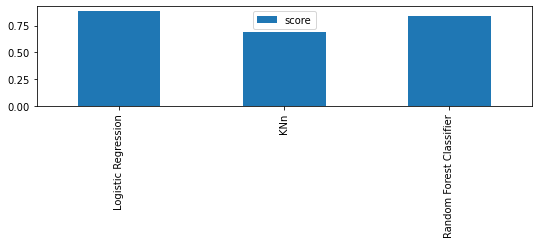

In [121]:
model_compare.T.plot.bar()

# Tuning the models  and Hyperparameter tuning

In [123]:
##       1. Tuning Knn bcz it performs the worst 

In [128]:
train_scores = []
test_scores = []

neighbours = range(1,21)

knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors = i)
    
    knn.fit(X_train,Y_train)
    train_scores.append( knn.score(X_train,Y_train) )
    test_scores.append( knn.score(X_test,Y_test) )

Maximum KNN score on the test data: 75.41%


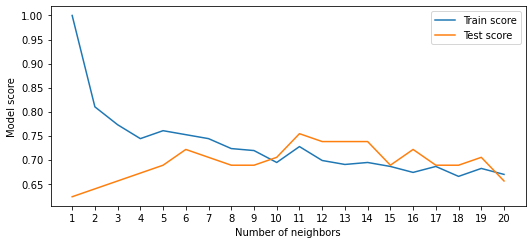

In [129]:
plt.plot(neighbours, train_scores, label="Train score")
plt.plot(neighbours, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

# rejecting KNN

# Randomized search CV hyperparameter tuning

1. Linear Regression 
2. Random Forest

In [148]:
##        Setting up hyper-parameters


log_reg_grid = { "C" : np.logspace(-4,4,20),
                 "solver" : ["liblinear"]
                 }


rf_grid = { "n_estimators" : np.arange(10,1000,50),
            "max_depth" : [None, 3, 5 , 10],
            "min_samples_split" : np.arange(2, 20, 2),
            "min_samples_leaf" : np.arange(1, 20, 2)
         
            }

In [140]:
np.random.seed()


rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose=True)


rs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [143]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [144]:
rs_log_reg.score(X_test, Y_test)

0.8852459016393442

# Tuning Random F0rest 

In [149]:
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   34.6s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [153]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [154]:
rs_rf.score(X_test, Y_test)

0.8688524590163934

# Grid Search Cv for logistic regression

In [156]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, Y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished


In [157]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [158]:
gs_log_reg.score(X_test, Y_test)

0.8852459016393442

# Evaluating ML model


1. Confusion matrix
2. F1 score
3. ROC curve

In [162]:
Y_preds = gs_log_reg.predict(X_test)

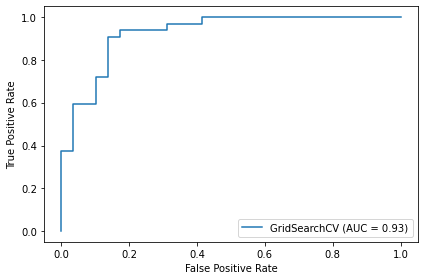

In [168]:
plot_roc_curve( gs_log_reg , X_test , Y_test)

In [169]:
confusion_matrix(Y_test, Y_preds)

array([[25,  4],
       [ 3, 29]])

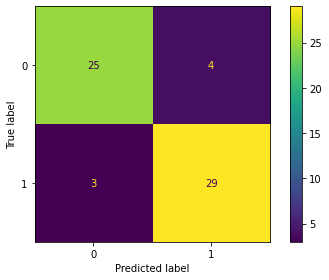

In [175]:
plot_confusion_matrix( gs_log_reg, X_test, Y_test) 

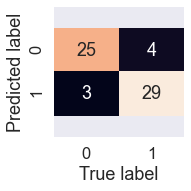

In [176]:
sns.set(font_scale=1.5)

def plot_conf_mat(Y_test, Y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(Y_test, Y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(Y_test, Y_preds)

In [177]:
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# using K fold validation for evaluation

In [178]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [179]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [185]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring="accuracy")
#cv_acc = np.mean(cv_acc)
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [187]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [189]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8215873015873015

In [191]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [193]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

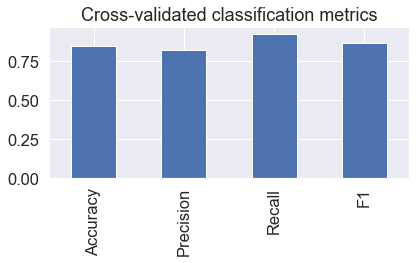

In [194]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

# Important Feature extraction

In [195]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [197]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, Y_train);

In [198]:
clf.coef_

array([[ 0.00316728, -0.86044681,  0.66067028, -0.01156993, -0.00166374,
         0.04386098,  0.31275871,  0.02459362, -0.60413098, -0.56862784,
         0.45051633, -0.63609911, -0.67663374]])

In [204]:
# Match coef's of features to columns
feature_dict = dict(zip(heart_disease.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672836648050503,
 'sex': -0.8604468104930325,
 'cp': 0.6606702797887507,
 'trestbps': -0.01156993266606034,
 'chol': -0.0016637447948541165,
 'fbs': 0.043860983413115645,
 'restecg': 0.31275871271392713,
 'thalach': 0.024593615341531826,
 'exang': -0.6041309838702352,
 'oldpeak': -0.5686278420079321,
 'slope': 0.45051633355228077,
 'ca': -0.6360991091618156,
 'thal': -0.6766337375624075}

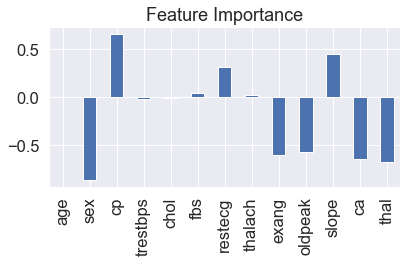

In [205]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);